# Section F. Logistic Regression vs. Bayesian Classifier


## Discriminative vs Generative Models (Question 7 )


 - Student Name: Akshay Sapra 
 - Stuident ID: 29858186
 
Programming Language used: R in Jupyter Notebook

Libraries Used: 
- mvtnorm - Computes multivariate normal and t probabilities, quantiles, random deviates and densities.
- reshape2 - To reshape the data
- ggplot2 - for data visualisations

### Steps for the solution
<ol>
	<li>Load the Train and test dataset provided as part of the assignment specification,</li>
    <li>Define the Bayesian Classifier and Loggistic Regression function,</li>
       <li>Train the models with 5 rows at a time,</li>
	<li>Report the observations on the effect of size of training sets on the classifier models.</li>
	

### Libraries used

In [86]:
library(mvtnorm) # Computes multivariate normal and t probabilities, quantiles, random deviates and densities.
library(reshape2) # To reshape the data
library (ggplot2) # for data visualisations

### Load And Explore Data

#### Task 1

Load Task1E_train.csv and Task1E_test.csv as well as the Bayesian
classifier (BC) and logistic regression (LR) codes from Activities 2 and 3 in
Module 3.

In [11]:
# REading the data from csv 
Train= read.csv('Task1E_train.csv')
Test= read.csv('Task1E_test.csv')

In [12]:
# Checking first few rows 
head(Train)

x1,x2,y
-0.4367052,3.171451,-1
5.1048972,1.227815,1
3.9974518,1.049502,1
2.5354540,1.242902,1
4.2624556,2.551909,1
1.5505866,2.595164,-1


In [13]:
# Checking first few rows 
head(Test)

x1,x2,y
3.4781571,-0.51546992,1
4.8959781,0.95320554,1
-0.5783557,5.44553527,-1
3.8417831,0.65759443,1
2.2649154,4.18082840,-1
3.8550566,-0.08328894,1


In [14]:
# checking dimension of the data 
dim (Train)
dim(Train)

[1] 500   3

[1] 500   3

#### Bayesian Classifier Function

In [65]:
BC <- function (Train, Test){
    #divinding train and test data into separate data and label columns 
    #have not used indices as train and test data both are separate
    train.data <- Train[,-3]
    train.label<-Train[,'y']
    test.data<- Test [,-3]
    test.label<-Test[,'y']
    
    c0 <- '1';    c1 <- '-1' # class labels
    # Class probabilities:
    p0.hat <- sum(train.label==c0)/nrow(train.data) # total number of samples in class 0 divided by the total nmber of training data
    p1.hat <- sum(train.label==c1)/nrow(train.data) # or simply 1 - p1.hat
    # Class means:
    mu0.hat <- colMeans(train.data[train.label==c0,])
    mu1.hat <- colMeans(train.data[train.label==c1,])
    # class covariance matrices:
    sigma0.hat <- var(train.data[train.label==c0,])
    sigma1.hat <- var(train.data[train.label==c1,])

    # shared covariance matrix:
    sigma.hat <- p0.hat * sigma0.hat + p1.hat * sigma1.hat 
    # calculate posteriors:
    posterior0 <- p0.hat*dmvnorm(x=train.data, mean=mu0.hat, sigma=sigma.hat)
    posterior1 <- p1.hat*dmvnorm(x=train.data, mean=mu1.hat, sigma=sigma.hat)
    # calculate predictions:
    train.predict <- ifelse(posterior0 > posterior1, c0, c1)
    test.predict <- ifelse(p0.hat*dmvnorm(x=test.data, mean=mu0.hat, sigma=sigma.hat) > p1.hat*dmvnorm(x=test.data, mean=mu1.hat, sigma=sigma.hat), c0, c1)
    train.accuracy = sum(train.label==train.predict)/nrow(train.data)*100
    test.accuracy = sum(test.label==test.predict)/nrow(test.data)*100
    train.error = sum(train.label!=train.predict)/nrow(train.data)*100
    test.error = sum(test.label!=test.predict)/nrow(test.data)*100

    return (list(train.error, test.error))
}

#### Loggistic Regression Function

In [60]:
# auxiliary function that predicts class labels
predict <- function(w, X, c0, c1){
    sig <- sigmoid(w, X)
    return(ifelse(sig>0.5, c1,c0))
}
    
# auxiliary function that calculate a cost function
cost <- function (w, X, T, c0){
  
    sig <- sigmoid(w, X)
    return(sum(ifelse(T==c0, 1-sig, sig)))
}

# Sigmoid function (=p(C1|X))
sigmoid <- function(w, x){
    return(1.0/(1.0+exp(-w %*% t(cbind(1,x)))))    
}

LR <- function (Train, Test){
    #divinding train and test data into separate data and label columns 
    #have not used indices as train and test data both are separate
    train.data <- Train[,-3]
    train.label<-Train[,'y']
    test.data<- Test [,-3]
    test.label<-Test[,'y']
    
    c0 <- '1'; c1 <- '-1' # class labels
    train.len <- nrow(train.data)

    
    # Initializations
    tau.max <- 1000 # maximum number of iterations
    eta <- 0.01 # learning rate
    epsilon <- 0.01 # a threshold on the cost (to terminate the process)
    tau <- 1 # iteration counter
    terminate <- FALSE

    ## Just a few name/type conversion to make the rest of the code easy to follow
    X <- as.matrix(train.data) # rename just for conviniance
    T <- ifelse(train.label==c0,0,1) # rename just for conviniance

    W <- matrix(,nrow=tau.max, ncol=(ncol(X)+1)) # to be used to store the estimated coefficients
    W[1,] <- runif(ncol(W)) # initial weight (any better idea?)

    # project data using the sigmoid function (just for convenient)
    Y <- sigmoid(W[1,],X)

    costs <- data.frame('tau'=1:tau.max)  # to be used to trace the cost in each iteration
    costs[1, 'cost'] <- cost(W[1,],X,T, c0)
    while(!terminate){
    # check termination criteria:
    terminate <- tau >= tau.max | cost(W[tau,],X,T, c0)<=epsilon
    
    # shuffle data:
    train.index <- sample(1:train.len, train.len, replace = FALSE)
    X <- X[train.index,]
    T <- T[train.index]
    
    # for each datapoint:
    for (i in 1:train.len){
        # check termination criteria:
        if (tau >= tau.max | cost(W[tau,],X,T, c0) <=epsilon) {terminate<-TRUE;break}
        
        Y <- sigmoid(W[tau,],X)
            
        # Update the weights
        W[(tau+1),] <- W[tau,] - eta * (Y[i]-T[i]) * cbind(1, t(X[i,]))
        
        # record the cost:
        costs[(tau+1), 'cost'] <- cost(W[tau,],X,T, c0)
        
        # update the counter:
        tau <- tau + 1
        
        # decrease learning rate:
        eta = eta * 0.999
    }
    }
    # Done!
    costs <- costs[1:tau, ] # remove the NaN tail of the vector (in case of early stopping)

    # the  final result is:
    w <- W[tau,]
    # calculate predictions:
    train.predict <- predict (w,train.data,c0,c1)
    test.predict <- predict (w,test.data,c0,c1)
    train.accuracy = sum(train.label==train.predict)/nrow(train.data)*100
    test.accuracy = sum(test.label==test.predict)/nrow(test.data)*100
    train.error = sum(train.label!=train.predict)/nrow(train.data)*100
    test.error = sum(test.label!=test.predict)/nrow(test.data)*100
    return (list(train.error,test.error))
}


In [61]:
LR(Train[1:5,], Test[1:5,])

[[1]]
[1] 0

[[2]]
[1] 20

#### Task II
Using the first 5 data points from the training set, train a BC and a LR
model, and compute their test errors. In a “for loop”, increase the size of
training set (5 data points at a time), retrain the models and calculate
their test errors until all training data points are used. In one figure, plot
the test errors for each model (with different colors) versus the size of the
training set; include the plot in your Jupyter Notebook file for Question 7. 

In [72]:
#Computing test error by gradually increase the training set by 5 variables in each iterations
BC.error <- data.frame ("Num"=rep(0,100), "BC"=rep(0,100))
LR.error <- data.frame ("Num"=rep(0,100), "LR"=rep(0,100))
#for loop to increase the training set
for (i in 1:100){
    j=i*5
    BC.result <- BC(Train[1:j,], Test[1:j,])
    BC.error[i,] <- c(j,BC.result[2])
    LR.result <- LR(Train[1:j,], Test[1:j,])
    LR.error[i,] <- c(j,LR.result[2])   
}



In [ ]:
#Combining two datasets
result = cbind (LR.error,"BC"=BC.error[,2] )
#REshaping the data
result.m=melt(result, id=c('Num'))


#### Visualisation

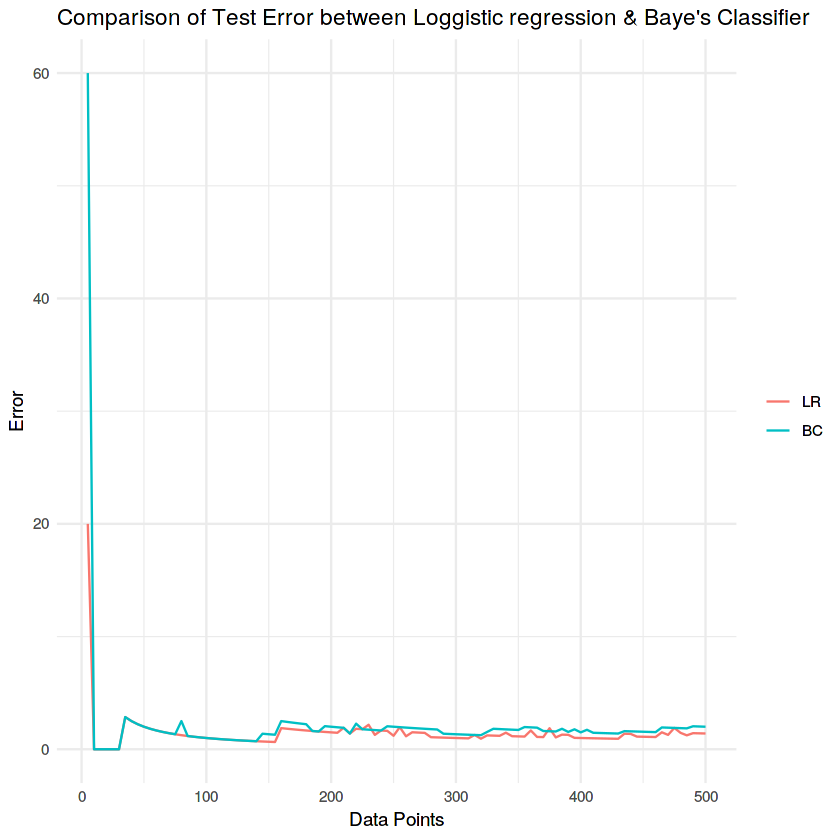

In [92]:
#Note that for every N errors for SGD in the plot, you will only have one error for BGD; the total length of the x-axis will be 18x N.
ggplot(data=result.m, aes(x=Num, y=value, color=variable)) + geom_line() + 
  scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
  ggtitle("Comparison of Test Error between Loggistic regression & Baye's Classifier")+ylab("Error")+xlab("Data Points")

#### Task III

**Observations**
- For Both of the classifiers Test Error starts to decrease rapidly on increasing the number of training data points.
- It is evident from the graph that Baye's classifier should be the ideal choice when data set is small and Loggistic regression should be chosen when data size is big enough.
- Both the algorithms are used for classification but one of the prime difference between them is BC is a generative model uses joint probability to classify the item hence works better with small training set while LR is a discriminative model which directly estimate the probability by finding the optimal decision boundary hence it works better with larger set.